In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from matplotlib import rc

pd.options.display.max_columns = None
plt.rcParams.update({'font.size': 22})

# Dataset reading and cleaning

In [2]:
df = pd.read_csv("wyred-data.csv")

In [3]:
df.shape

(29, 66)

In [4]:
for n in range(0, df.shape[1]):
    df.rename(columns={ df.columns[n]: df.columns[n].replace(":", "").replace(" ", "_") }, inplace=True)
    
for i, n in enumerate(range(6, 22)):
    df.rename(columns={ df.columns[n]: "CSUQ_" + str(i+1) }, inplace=True)
    
    
csuq_cols = []

for i in range(1, 17):
    csuq_cols.append('CSUQ_'+str(i))
    
df.rename(columns={ df.columns[22]: "Comments" }, inplace=True)
df.rename(columns={ df.columns[23]: "Language_EN" }, inplace=True)
df.rename(columns={ df.columns[24]: "Language_GER" }, inplace=True)
df.rename(columns={ df.columns[25]: "Language_HEB" }, inplace=True)
df.rename(columns={ df.columns[26]: "Language_IT" }, inplace=True)
df.rename(columns={ df.columns[27]: "Language_ESP" }, inplace=True)
df.rename(columns={ df.columns[28]: "Language_TUR" }, inplace=True)
df.rename(columns={ df.columns[29]: "Facilitator" }, inplace=True)
df.rename(columns={ df.columns[30]: "Device_COMPUTER" }, inplace=True)
df.rename(columns={ df.columns[31]: "Device_SMARTPHONE" }, inplace=True)
df.rename(columns={ df.columns[32]: "Device_TABLET" }, inplace=True)
df.rename(columns={ df.columns[33]: "Device_OTHER" }, inplace=True)
df.rename(columns={ df.columns[34]: "OS_ANDROID" }, inplace=True)
df.rename(columns={ df.columns[35]: "OS_CHROME" }, inplace=True)
df.rename(columns={ df.columns[36]: "OS_IOS" }, inplace=True)
df.rename(columns={ df.columns[37]: "OS_LINUX" }, inplace=True)
df.rename(columns={ df.columns[38]: "OS_MACOS" }, inplace=True)
df.rename(columns={ df.columns[39]: "OS_WINDOWS" }, inplace=True)
df.rename(columns={ df.columns[40]: "OS_OTHER" }, inplace=True)
df.rename(columns={ df.columns[41]: "Browser_CHROME" }, inplace=True)
df.rename(columns={ df.columns[42]: "Browser_EDGE" }, inplace=True)
df.rename(columns={ df.columns[43]: "Browser_FIREFOX" }, inplace=True)
df.rename(columns={ df.columns[44]: "Browser_IE" }, inplace=True)
df.rename(columns={ df.columns[45]: "Browser_SAFARI" }, inplace=True)
df.rename(columns={ df.columns[46]: "Browser_OTHER" }, inplace=True)
df.rename(columns={ df.columns[47]: "Birthdate" }, inplace=True)
df.rename(columns={ df.columns[49]: "Country" }, inplace=True)
df.rename(columns={ df.columns[50]: "Vision_Disability" }, inplace=True)
df.rename(columns={ df.columns[51]: "Vision_Disability_Other" }, inplace=True)

# Drop rows without PSSUQ responses (i.e., at least one item answered)
df = df.dropna(axis=0, subset=pssuq_cols, thresh=1)
df = df.replace('No', 0)
df = df.replace('Yes', 1)

In [5]:
df.head()

,Response_ID,Date_submitted,Last_page,Start_language,Date_started,Date_last_action,CSUQ_1,CSUQ_2,CSUQ_3,CSUQ_4,CSUQ_5,CSUQ_6,CSUQ_7,CSUQ_8,CSUQ_9,CSUQ_10,CSUQ_11,CSUQ_12,CSUQ_13,CSUQ_14,CSUQ_15,CSUQ_16,Comments,Language_EN,Language_GER,Language_HEB,Language_IT,Language_ESP,Language_TUR,Facilitator,Device_COMPUTER,Device_SMARTPHONE,Device_TABLET,Device_OTHER,OS_ANDROID,OS_CHROME,OS_IOS,OS_LINUX,OS_MACOS,OS_WINDOWS,OS_OTHER,Browser_CHROME,Browser_EDGE,Browser_FIREFOX,Browser_IE,Browser_SAFARI,Browser_OTHER,Birthdate,Gender,Country,Vision_Disability,Vision_Disability_Other,Total_time,Group_time_Usability,Question_time_Q00001,Question_time_Q00002,Group_time_Context,Question_time_Q00003,Question_time_Q00004,Question_time_Q00005,Question_time_Q00006,Question_time_Q00007,Question_time_Q00008,Question_time_Q00009,Question_time_Q00010,Question_time_Q00011
0,7,2019-01-11 16:38:32,2,en,2019-01-11 16:35:41,2019-01-11 16:38:32,7.0,7.0,7.0,5.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,4.0,5.0,5.0,3.0,6.0,NaN,1,0,0,0,1,0,1,1,1,0,NaN,0,0,1,0,1,0,NaN,1,0,0,0,1,NaN,1971,Male,Spain,None,NaN,170.95,99.91,NaN,NaN,71.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,2019-01-14 09:53:51,2,en,2019-01-14 09:48:38,2019-01-14 09:53:51,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,1,1,1,0,NaN,0,0,1,0,0,1,NaN,1,0,0,0,1,NaN,1993,Female,Turkey,None,NaN,313.74,176.22,NaN,NaN,137.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,2019-01-15 12:52:26,2,en,2019-01-15 12:47:20,2019-01-15 12:52:26,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,I don't understand the usefulness of a survey ...,1,0,0,0,0,0,1,1,0,0,NaN,0,0,0,0,0,1,NaN,0,1,1,0,0,NaN,1931,No answer,Australia,None,NaN,306.27,238.02,NaN,NaN,68.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2019-01-15 12:53:17,2,en,2019-01-15 12:48:41,2019-01-15 12:53:17,1.0,2.0,2.0,1.0,2.0,2.0,5.0,4.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,1,0,0,1,0,0,0,1,1,1,NaN,1,0,0,0,0,1,NaN,0,0,0,1,0,NaN,1977,Female,Italy,None,NaN,275.66,184.76,NaN,NaN,90.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2019-01-15 12:55:23,2,en,2019-01-15 12:49:55,2019-01-15 12:55:23,3.0,3.0,2.0,3.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,NaN,1,0,0,0,0,0,1,1,0,0,NaN,0,0,0,0,0,1,NaN,1,0,0,0,0,NaN,1958,No answer,Israel,None,NaN,328.54,170.73,NaN,NaN,157.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(28, 66)

# Calculation of CSUQ sub-scales and total score
The CSUQ questionnaire has 3 sub-scales: 
- System Quality (items' 1-6 average)
- Information Quality (items' 7-12 average)
- Interface Quality (items' 13-16 average)

In [7]:
system_quality_cols = []

for i in range(1, 7):
    system_quality_cols.append('CSUQ_'+str(i))
    
df['CSUQ_SysQual'] = df[system_quality_cols].mean(axis=1)

In [8]:
information_quality_cols = []

for i in range(7, 13):
    information_quality_cols.append('CSUQ_'+str(i))
    
df['CSUQ_InfoQual'] = df[information_quality_cols].mean(axis=1)

In [9]:
interface_quality_cols = []

for i in range(13, 17):
    interface_quality_cols.append('CSUQ_'+str(i))
    
df['CSUQ_IntQual'] = df[interface_quality_cols].mean(axis=1)

In [10]:
df['CSUQ_Total'] = df[['CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual']].mean(axis=1)

In [11]:
print(df[['CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual', 'CSUQ_Total']].mean())
overall_results = np.array(df[['CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual', 'CSUQ_Total']].mean())

CSUQ_SysQual     4.872619
CSUQ_InfoQual    5.016049
CSUQ_IntQual     4.818452
CSUQ_Total       4.922024
dtype: float64


In [12]:
CSUQ_cols = []
for i in range(1, 17):
    CSUQ_cols.append('CSUQ_'+str(i))
    
print(df[CSUQ_cols].mean())
items_results = np.array(df[CSUQ_cols].mean())

CSUQ_1     4.714286
CSUQ_2     5.071429
CSUQ_3     4.892857
CSUQ_4     4.750000
CSUQ_5     5.178571
CSUQ_6     4.653846
CSUQ_7     4.863636
CSUQ_8     5.208333
CSUQ_9     5.370370
CSUQ_10    4.814815
CSUQ_11    5.160000
CSUQ_12    4.777778
CSUQ_13    5.035714
CSUQ_14    4.653846
CSUQ_15    4.428571
CSUQ_16    5.071429
dtype: float64


# The confidence interval is calculated as well
The confidence interval will be 95%, given the limited sample size of the study

In [13]:
from scipy import stats
from math import sqrt

confidence = 0.95
def ci_calculation(data):
    std = data.std()
    print("Standard deviation: " + str(std))
    print("Degrees of freedom: " + str(data.shape[0] - 1))
    t_crit = stats.t.ppf((1 + confidence) / 2., data.shape[0] - 1)
    print("T-critical value (0.01, " + str(data.shape[0] - 1) + "): " + str(t_crit))

    margin_error = t_crit * (std/sqrt(data.shape[0]))
    print("\nMargin of error: " + str(margin_error))

    print("\n\nConfidence interval (95%): " + str(data.mean() - margin_error) + " to " + str(data.mean() + margin_error) + "\n")
    return margin_error

In [14]:
error_item = []

for i in range(1, 17):
    print('Item number ' + str(i) + '\n')
    error_item.append(ci_calculation(df['CSUQ_'+str(i)]))
    print('-----------------------\n')

Item number 1

Standard deviation: 1.9973527453652218
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.7744925416793992


Confidence interval (95%): 3.9397931726063153 to 5.488778255965114

-----------------------

Item number 2

Standard deviation: 1.8038758976072202
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.6994700520746333


Confidence interval (95%): 4.371958519353938 to 5.7708986235032045

-----------------------

Item number 3

Standard deviation: 1.9501051389373991
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.7561718324929699


Confidence interval (95%): 4.136685310364173 to 5.649028975350113

-----------------------

Item number 4

Standard deviation: 2.204792759220492
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.8549293818667846


Confidence interval (95%): 3.8950706181332153 to 5.604929381866785


In [15]:
error_overall = []

for x in ['CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual', 'CSUQ_Total']:
    print('Item ' + x + '\n')
    error_overall.append(ci_calculation(df[str(x)]))
    print('-----------------------\n')

Item CSUQ_SysQual

Standard deviation: 1.87577262153215
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.7273486912285094


Confidence interval (95%): 4.1452703563905375 to 5.599967738847556

-----------------------

Item CSUQ_InfoQual

Standard deviation: 1.6157972912331675
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.6265407819573892


Confidence interval (95%): 4.38950860075866 to 5.642590164673438

-----------------------

Item CSUQ_IntQual

Standard deviation: 1.8438326701042898
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.7149636709961634


Confidence interval (95%): 4.103488709956218 to 5.533416051948545

-----------------------

Item CSUQ_Total

Standard deviation: 1.730687731275915
Degrees of freedom: 27
T-critical value (0.01, 27): 2.0518305164802833

Margin of error: 0.67109064383324


Confidence interval (95%): 4.250933165690569 to 5.59311445

# Below are the means and 99% intervals for PSSUQ (version 3) norms
Retrieved from <i>Sauro, J., & Lewis, J. R. (2016). Quantifying the user experience: Practical statistics for user research. Morgan Kaufmann.</i>





![title](img/pssuq-norms.png)

These values are reversed, as the original PSSUQ likert scales codify 1 as "Strongly agree" and 7 as "Strongly disagree".
However, it does not have any further implications regarding the questionnaire results (users were aware of the meaning of the scale).
To compare the obtained values to the PSSUQ norms, it is necessary to reverse the 7-point scale by subtracting from 7 and adding 1. 

In [16]:
items_norm = 7 - np.array([2.85, 2.69, 3.16, 2.66, 2.27, 2.86, 3.70, 3.21, 2.96, 3.09, 2.74, 2.66, 2.28, 2.42, 1.79, 2.82]) + 1
overall_norm = 7 - np.array([2.80, 3.02, 2.49, 2.82]) + 1

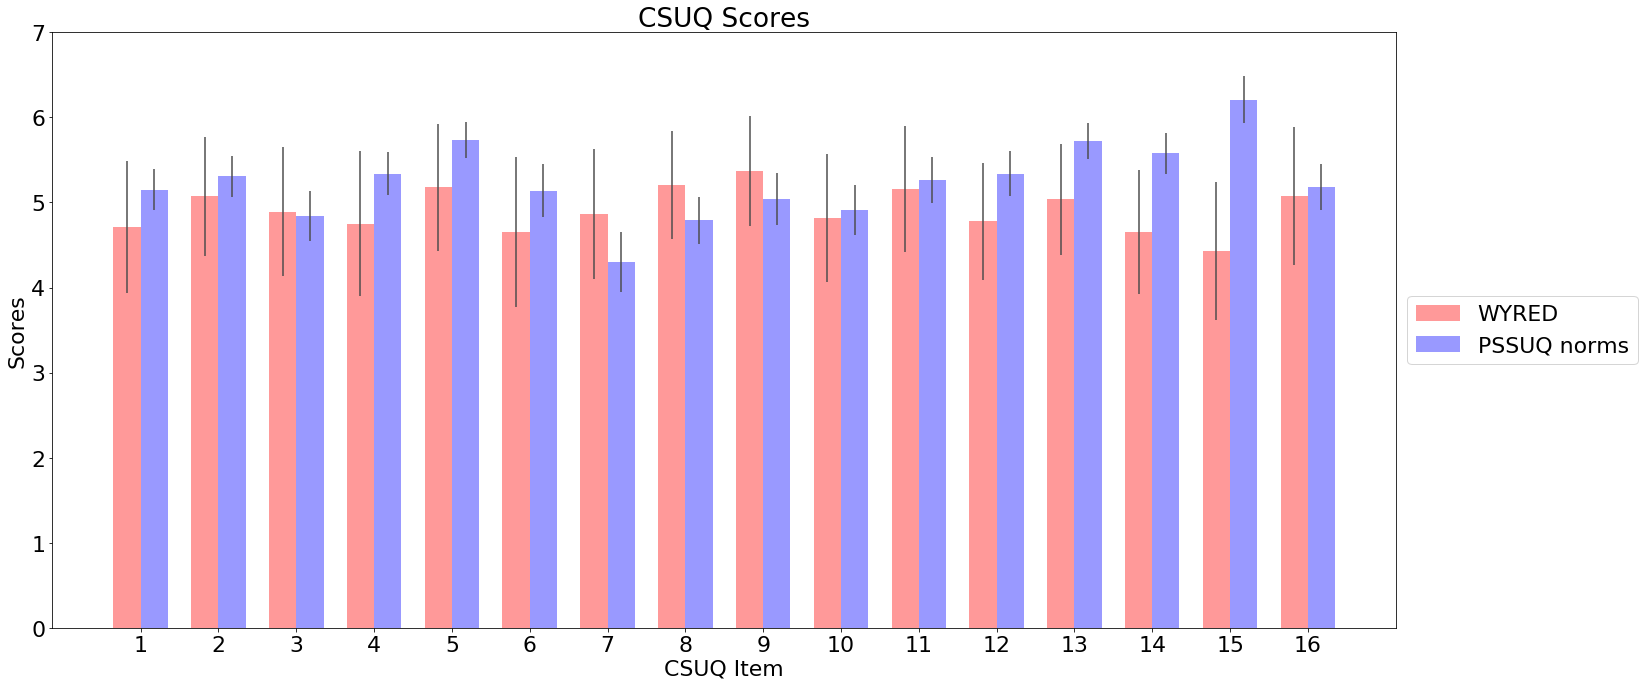

In [17]:
n_groups = 16
fig, ax = plt.subplots(figsize=(20,10))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, items_results, bar_width,
                alpha=opacity, color='r',
                yerr=error_item, error_kw={'ecolor': '0.3'},
                label='WYRED')

error_item_norm = (0.24, 0.24, 0.29, 0.25, 0.21, 0.31, 0.35, 0.28, 0.31, 0.29, 0.27, 0.26, 0.21, 0.24, 0.28, 0.27)

rects2 = ax.bar(index + bar_width, items_norm, bar_width,
                alpha=opacity, color='b',
                yerr=error_item_norm, error_kw={'ecolor': '0.3'},
                label='PSSUQ norms')

ax.set_xlabel('CSUQ Item')
ax.set_ylabel('Scores')
ax.set_title('CSUQ Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.ylim(0, 7)

plt.savefig('item_scores.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

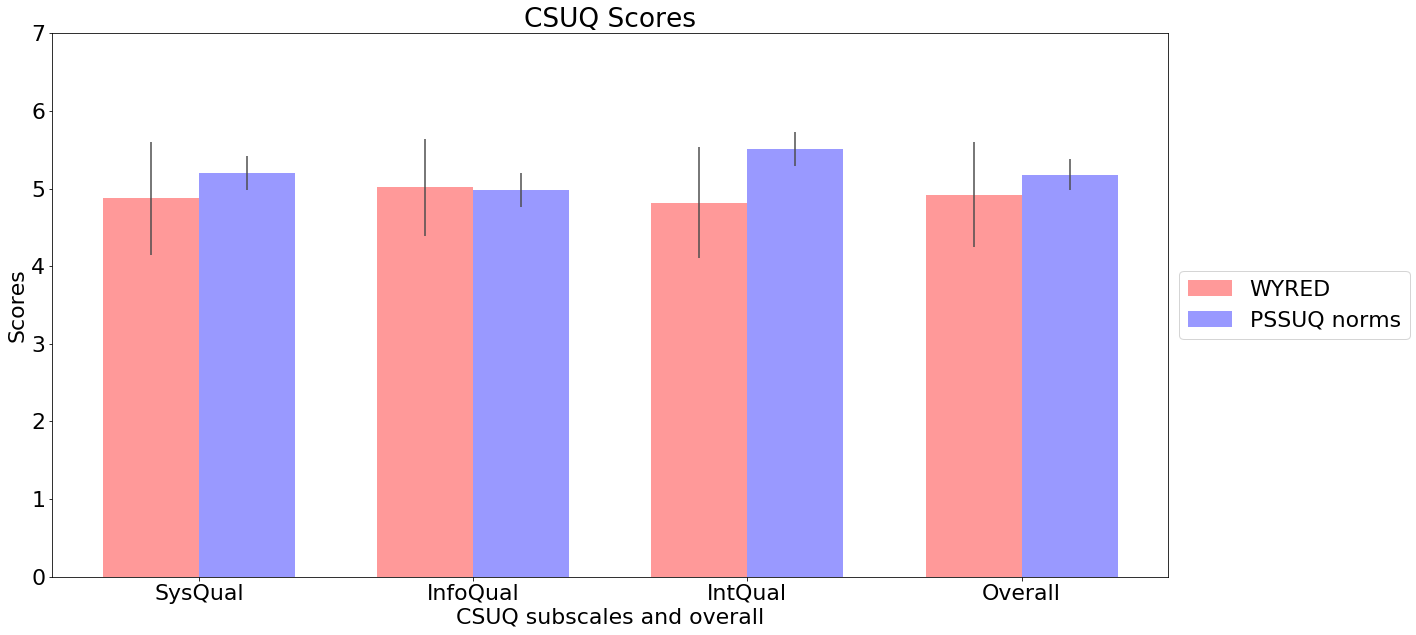

In [18]:
n_groups = 4
fig, ax = plt.subplots(figsize=(20,10))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, overall_results, bar_width,
                alpha=opacity, color='r',
                yerr=error_overall, error_kw={'ecolor': '0.3'},
                label='WYRED')

error_overall_norm = (0.22, 0.22, 0.22, 0.2)

rects2 = ax.bar(index + bar_width, overall_norm, bar_width,
                alpha=opacity, color='b',
                yerr=error_overall_norm, error_kw={'ecolor': '0.3'},
                label='PSSUQ norms')

ax.set_xlabel('CSUQ subscales and overall')
ax.set_ylabel('Scores')
ax.set_title('CSUQ Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('SysQual', 'InfoQual', 'IntQual', 'Overall'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 7)

plt.savefig('overall_scores.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
CSUQ_values = {
    "likert_7": [],
    "likert_6": [],
    "likert_5": [],
    "likert_4": [],
    "likert_3": [],
    "likert_2": [],
    "likert_1": [],
    "likert_NA": []
}


for i in range(1, 17):
    for n in range(1, 8):
        CSUQ_values['likert_'+str(n)].append(df[df['CSUQ_'+str(i)] == n].shape[0])
    CSUQ_values['likert_NA'].append(df[df['CSUQ_'+str(i)].isnull()].shape[0])

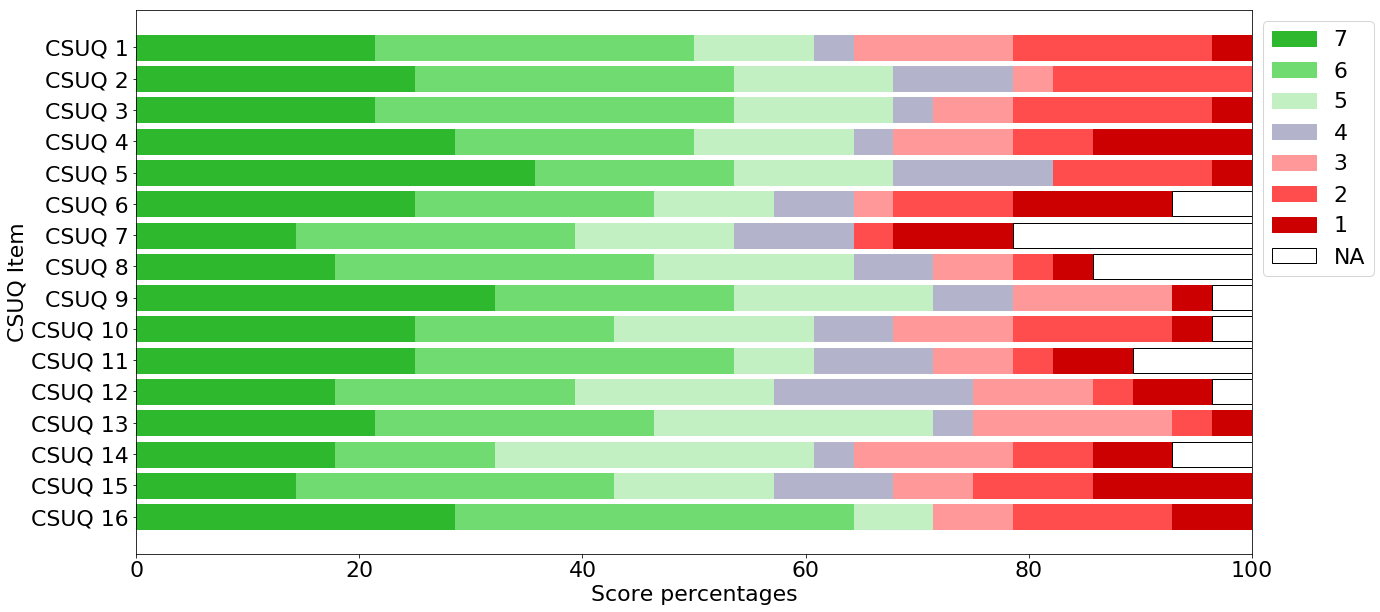

In [20]:
plt.figure(figsize=(20,10))
 
# Data
r = []
step = 10
for i in range(0, 16):
    r.append(i+step)
    
df_l = pd.DataFrame(CSUQ_values)
 
# From raw value to percentage
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df_l['likert_7'], df_l['likert_6'], df_l['likert_5'], df_l['likert_4'], df_l['likert_3'], df_l['likert_2'], df_l['likert_1'], df_l['likert_NA'])][::-1]
l_7 = [i / j * 100 for i,j in zip(df_l['likert_7'], totals)][::-1]
l_6 = [i / j * 100 for i,j in zip(df_l['likert_6'], totals)][::-1]
l_5 = [i / j * 100 for i,j in zip(df_l['likert_5'], totals)][::-1]
l_4 = [i / j * 100 for i,j in zip(df_l['likert_4'], totals)][::-1]
l_3 = [i / j * 100 for i,j in zip(df_l['likert_3'], totals)][::-1]
l_2 = [i / j * 100 for i,j in zip(df_l['likert_2'], totals)][::-1]
l_1 = [i / j * 100 for i,j in zip(df_l['likert_1'], totals)][::-1]
l_NA = [i / j * 100 for i,j in zip(df_l['likert_NA'], totals)][::-1]

# plot
barWidth = 0.8

names = []
for i in range(1, 17):
    names.append('CSUQ ' + str(i))
names = names[::-1]

plt.barh(r, l_7, color='#2eb82e', edgecolor='#2eb82e', height=barWidth, label="7")
plt.barh(r, l_6, left=l_7, color='#70db70', edgecolor='#70db70', height=barWidth, label="6")
plt.barh(r, l_5, left=[i+j for i,j in zip(l_6, l_7)], color='#c2f0c2', edgecolor='#c2f0c2', height=barWidth, label="5")
plt.barh(r, l_4, left=[i+j+k for i,j,k in zip(l_7, l_6, l_5)], color='#b3b3cc', edgecolor='#b3b3cc', height=barWidth, label="4")
plt.barh(r, l_3, left=[i+j+k+l for i,j,k,l in zip(l_7, l_6, l_5, l_4)], color='#ff9999', edgecolor='#ff9999', height=barWidth, label="3")
plt.barh(r, l_2, left=[i+j+k+l+m for i,j,k,l,m in zip(l_7, l_6, l_5, l_4, l_3)], color='#ff4d4d', edgecolor='#ff4d4d', height=barWidth, label="2")
plt.barh(r, l_1, left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(l_7, l_6, l_5, l_4, l_3, l_2)], color='#cc0000', edgecolor='#cc0000', height=barWidth, label="1")
plt.barh(r, l_NA, left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(l_7, l_6, l_5, l_4, l_3, l_2, l_1)], color='#ffffff', edgecolor='black', height=barWidth, label="NA")

plt.yticks(r, names)
plt.ylabel("CSUQ Item")

plt.xlabel("Score percentages")

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.yticks()
plt.xticks()

plt.savefig('item_likert_scores.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
id_gender = 0
gender_dict = dict()
for x in df['Gender']:
    if not x in gender_dict:
        gender_dict[x] = id_gender
        id_gender += 1
        
df['Gender'].replace(gender_dict, inplace=True)

id_country = 0
country_dict = dict()
for x in df['Country']:
    if not x in country_dict:
        country_dict[x] = id_country
        id_country += 1
        
df['Country'].replace(country_dict, inplace=True)

not_csuq = []
for x in df.corr().columns:
    if x not in CSUQ_cols + ['CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual', 'CSUQ_Total']:
        not_csuq.append(x)

In [22]:
c = df.corr().drop(CSUQ_cols + ['Response_ID', 'Last_page', 'Question_time_Q00001', 'Question_time_Q00002', 'Question_time_Q00003', 'Question_time_Q00004', 'Question_time_Q00005', 'Question_time_Q00006', 'Question_time_Q00007', 'Question_time_Q00008', 'Question_time_Q00009', 'Question_time_Q00010', 'Question_time_Q00011', 'CSUQ_SysQual', 'CSUQ_InfoQual', 'CSUQ_IntQual', 'CSUQ_Total', 'Facilitator', 'Device_OTHER', 'OS_OTHER', 'Language_HEB'], axis=1).drop(not_csuq + ['Facilitator'], axis=0)

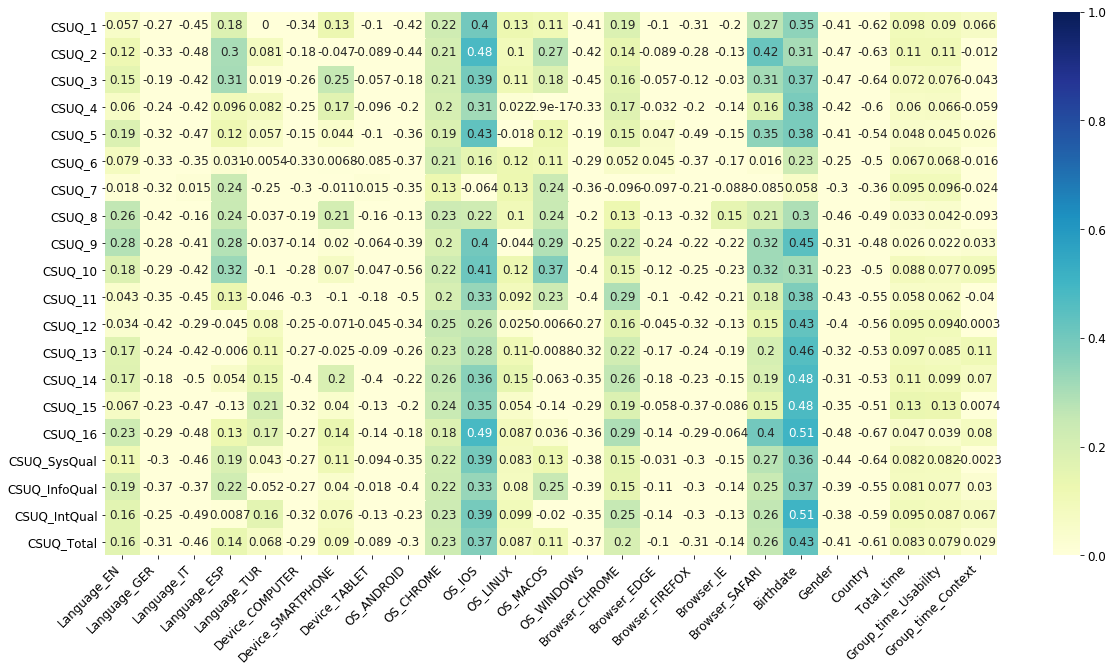

In [23]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20,10))
g = sns.heatmap(c,annot=True, cmap="YlGnBu", vmin=0, vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')

plt.savefig('item_correlation.png', format='png', dpi=300, bbox_inches='tight')
plt.show()